In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statsmodels.formula.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
data_classification = pd.read_csv('Ex02_TreeData_Classification.csv')
data_regression = pd.read_csv('Ex02_TreeData_Regreesion.csv')

## Selecting the Best Model - Feature Selection

### 1. Scatter Plot 

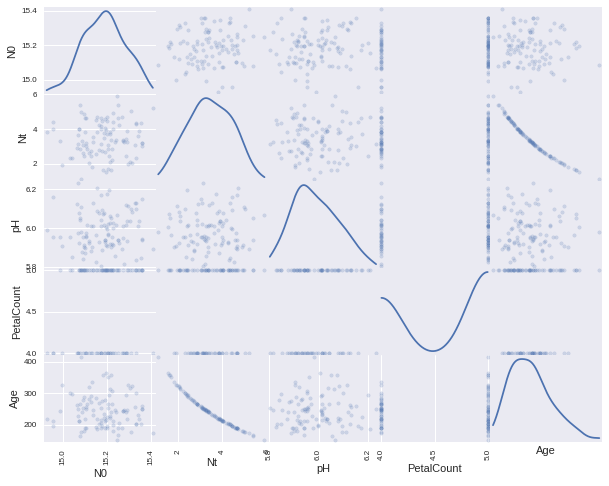

In [4]:
scatter_matrix(data_regression, alpha=0.2, figsize=(10, 8), diagonal='kde')
plt.xticks(())
plt.yticks(())

plt.show()

In [5]:
# Computing the correlation matrix
Correlation_data = data_regression.corr()
Correlation_data

,N0,Nt,pH,PetalCount,Age
N0,1.000000,0.080825,0.053488,0.127779,-0.058794
Nt,0.080825,1.000000,0.003821,-0.003614,-0.980478
pH,0.053488,0.003821,1.000000,0.099505,0.007455
PetalCount,0.127779,-0.003614,0.099505,1.000000,0.053744
Age,-0.058794,-0.980478,0.007455,0.053744,1.000000


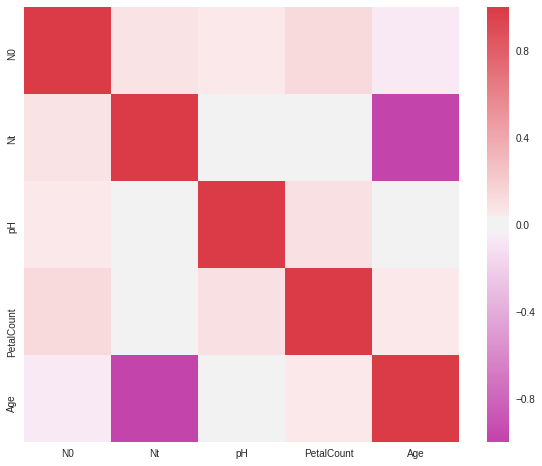

In [29]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(Correlation_data, mask=np.zeros_like(Correlation_data, dtype=np.bool), cmap=sns.diverging_palette(320, 10, as_cmap=True), square=True, ax=ax)

In [7]:
# init a Linear Regression Model
Linear_Model = LinearRegression()

###### Method 1 - Linear Regression Model

In [25]:

X = data_regression.drop(['Age'], axis=1)
Y = data_regression.Age

# Splitting into Testing and Training units
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4, train_size=.80, test_size=.20)
Linear_Model.fit(X_train, Y_train)
print("Intercept = ", Linear_Model.intercept_)
print("Coefficeints = ", Linear_Model.coef_)


Intercept =  240.181478256
Coefficeints =  [  9.23884541 -49.90688136   2.5332047    4.51793938]


##### Residuals

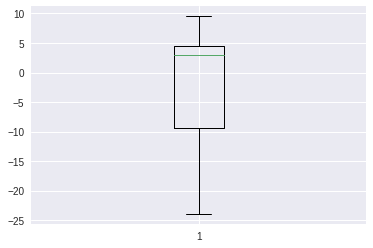

In [26]:
Residuals_allFeatures = np.array(Linear_Model.predict(X_test) - Y_test)
plt.boxplot(Residuals_allFeatures)
plt.show()

In [10]:
model_ALL = sm.ols(formula="Age ~ N0 + Nt + pH + PetalCount", data = data_regression[:80]).fit()
print(model_ALL.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     486.2
Date:                Thu, 30 Mar 2017   Prob (F-statistic):           8.60e-53
Time:                        13:45:42   Log-Likelihood:                -295.87
No. Observations:                  80   AIC:                             601.7
Df Residuals:                      75   BIC:                             613.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    355.1804    183.537      1.935      0.0

A look at the corelation matrix of Nt vs Age depicts an exponential relation.

## Taking the log of 'Nt' Feature

In [24]:
model_logNT = sm.ols(formula= "Age ~ np.log(Nt)", data = data_regression[:80]).fit()
print(model_logNT.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.732e+05
Date:                Thu, 30 Mar 2017   Prob (F-statistic):          2.70e-132
Time:                        13:46:58   Log-Likelihood:                -119.35
No. Observations:                  80   AIC:                             242.7
Df Residuals:                      78   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.7923      0.486    895.331      0.0

In [18]:
Predict_logNT = model_logNT.predict(X_test)

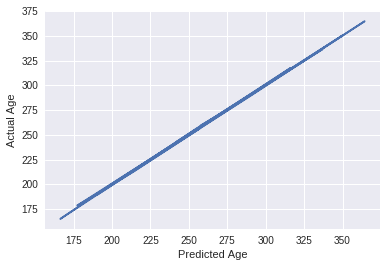

In [19]:
plt.plot(Predict_logNT, Y_test)
plt.xlabel("Predicted Age")
plt.ylabel("Actual Age")
plt.show()

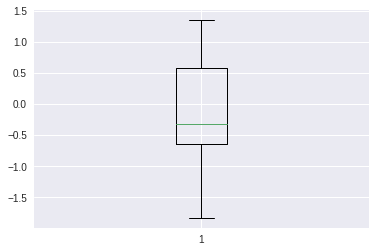

In [20]:
Residuals_NTOnly = np.array(Predict_logNT - Y_test)
plt.boxplot(Residuals_NTOnly)
plt.show()

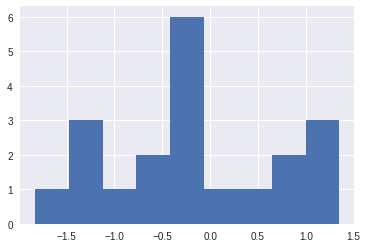

In [21]:
plt.hist(Residuals_NTOnly, bins=9)
plt.show()